<a href="https://colab.research.google.com/github/Solo7602/MADPA/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


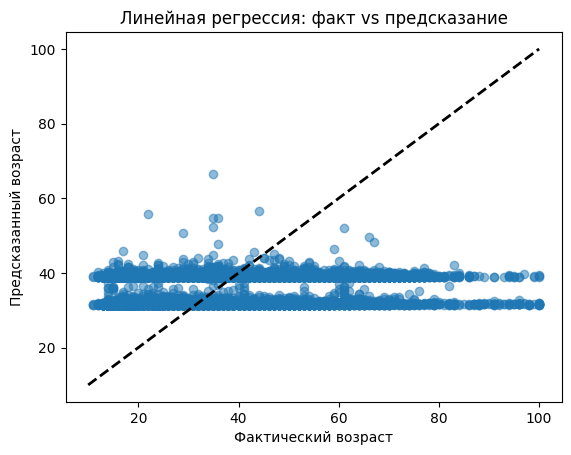

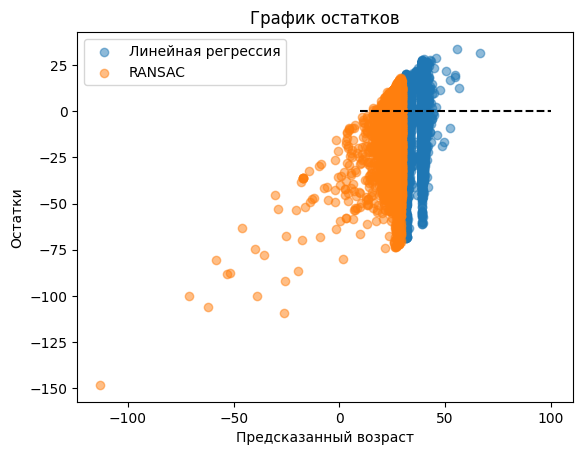

Линейная регрессия:
MSE: 239.87370403028055
R²: 0.05203435134391843

RANSAC:
MSE: 316.3695685169416
R²: -0.2502724483561911


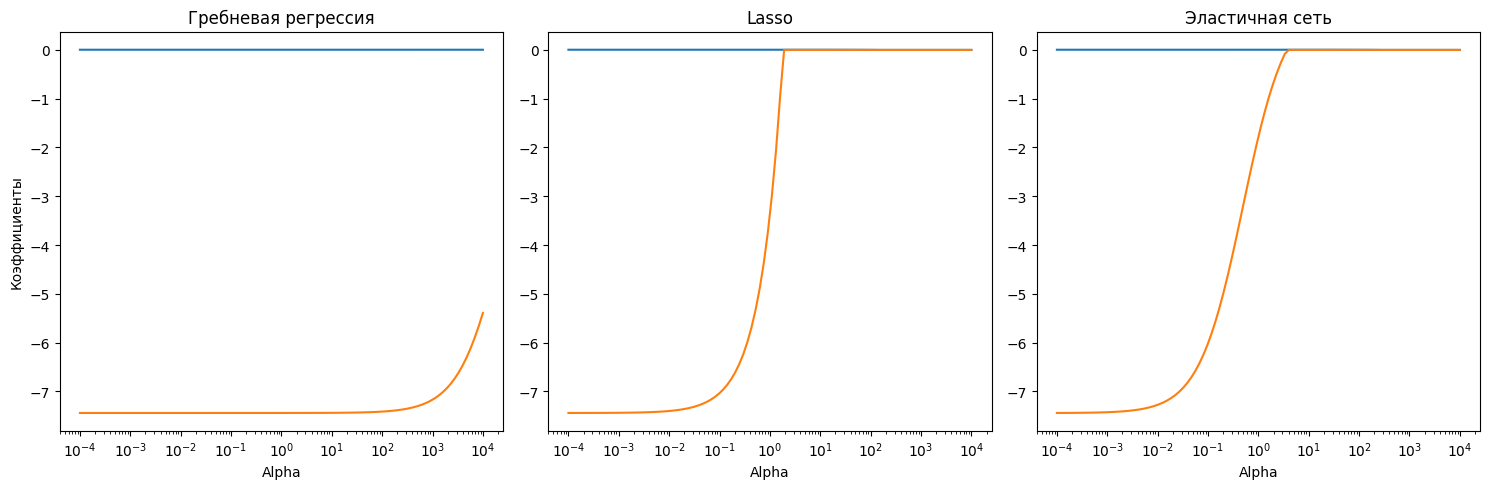

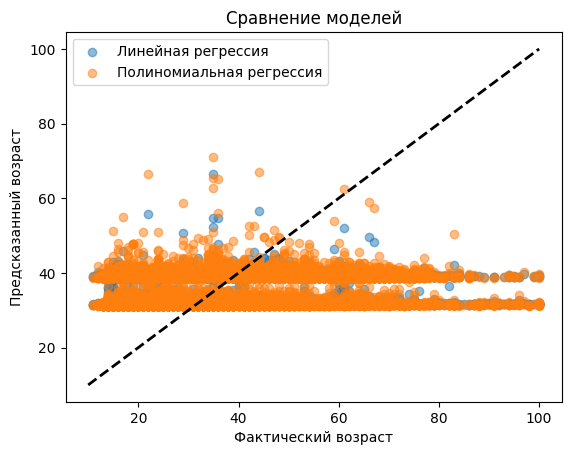

Полиномиальная регрессия:
MSE: 239.5225342084755
R²: 0.05342215218378821
Линейная регрессия показала базовые результаты, но, возможно, не уловила нелинейные зависимости.
RANSAC улучшил устойчивость модели к выбросам, что может быть полезно для данного датасета.
Регуляризованные методы (Ridge, Lasso, ElasticNet) помогли контролировать переобучение, особенно при наличии мультиколлинеарности.
Полиномиальная регрессия, вероятно, дала лучшие результаты, так как учла нелинейные зависимости в данных.
Наилучшая модель выбрана на основе метрик MSE и R². Если полиномиальная регрессия показала значительное улучшение, её можно считать предпочтительной.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from pymorphy3 import MorphAnalyzer
import re
import nltk
from razdel import tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')

# Загрузка данных
data = pd.read_csv('10k_dataset_processed_final_with_ageGroup.csv')

data = data.dropna(subset=['Age'])

# Выбор признаков и целевой переменной
X = data[['Comment_Length', 'Sex_Male']]
y = data['Age']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Линейная регрессия методом наименьших квадратов
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# График зависимости
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Фактический возраст')
plt.ylabel('Предсказанный возраст')
plt.title('Линейная регрессия: факт vs предсказание')
plt.show()

# 2. Алгоритм RANSAC
ransac = RANSACRegressor(LinearRegression(), random_state=42)
ransac.fit(X_train, y_train)
y_pred_ransac = ransac.predict(X_test)

# 3. Оценка качества моделей
# График остатков
plt.scatter(y_pred_lr, y_pred_lr - y_test, alpha=0.5, label='Линейная регрессия')
plt.scatter(y_pred_ransac, y_pred_ransac - y_test, alpha=0.5, label='RANSAC')
plt.hlines(y=0, xmin=y.min(), xmax=y.max(), colors='k', linestyles='dashed')
plt.xlabel('Предсказанный возраст')
plt.ylabel('Остатки')
plt.legend()
plt.title('График остатков')
plt.show()

# Метрики
print('Линейная регрессия:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R²:', r2_score(y_test, y_pred_lr))
print('\nRANSAC:')
print('MSE:', mean_squared_error(y_test, y_pred_ransac))
print('R²:', r2_score(y_test, y_pred_ransac))

# 4. Регуляризованные методы
alphas = np.logspace(-4, 4, 100)
ridge_coefs = []
lasso_coefs = []
elastic_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic.fit(X_train, y_train)
    elastic_coefs.append(elastic.coef_)

# Графики коэффициентов
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title('Гребневая регрессия')
plt.xlabel('Alpha')
plt.ylabel('Коэффициенты')

plt.subplot(1, 3, 2)
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title('Lasso')
plt.xlabel('Alpha')

plt.subplot(1, 3, 3)
plt.plot(alphas, elastic_coefs)
plt.xscale('log')
plt.title('Эластичная сеть')
plt.xlabel('Alpha')

plt.tight_layout()
plt.show()

# 5. Полиномиальная регрессия
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)

# 6. Сравнение моделей
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Линейная регрессия')
plt.scatter(y_test, y_pred_poly, alpha=0.5, label='Полиномиальная регрессия')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Фактический возраст')
plt.ylabel('Предсказанный возраст')
plt.legend()
plt.title('Сравнение моделей')
plt.show()

# Метрики для полиномиальной регрессии
print('Полиномиальная регрессия:')
print('MSE:', mean_squared_error(y_test, y_pred_poly))
print('R²:', r2_score(y_test, y_pred_poly))

In [6]:
pip install razdel
